In [3]:
import pandas as pd

In [ ]:
# # Load dataset
# df = pd.read_csv("../../datasets/ieee-train-merged_imputed_cleaned_dropped_stuff.csv")

# # Sort dataset by time
# df = df.sort_values(by="TransactionDT").reset_index(drop=True)

# # Create time-based features
# df['TimeInDay'] = df.TransactionDT % 86400
# df['Cents'] = df.TransactionAmt % 1

# # One-hot encoding for categorical features
# df = pd.get_dummies(df, columns=['ProductCD', 'card4', 'card6', 'P_emaildomain'], drop_first=True)

### Dataloaders

In [18]:
train_df = pd.read_csv("../../2_dataset/final/train_df.csv")
train_y = pd.read_csv("../../2_dataset/final/train_y_df.csv")

val_df = pd.read_csv("../../2_dataset/final/val_df.csv")
val_y = pd.read_csv("../../2_dataset/final/val_y_df.csv")

test_df = pd.read_csv("../../2_dataset/final/test_df.csv")
test_y = pd.read_csv("../../2_dataset/final/test_y_df.csv")


In [20]:
!pip install xgboost

  Using cached xgboost-2.1.4-py3-none-macosx_12_0_arm64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.4-py3-none-macosx_12_0_arm64.whl (1.9 MB)


In [23]:
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=10,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model with correct eval set
xgb_model.fit(train_df, train_y, eval_set=[(val_df, val_y)], verbose=True)

[0]	validation_0-logloss:0.35162
[1]	validation_0-logloss:0.34289
[2]	validation_0-logloss:0.33495
[3]	validation_0-logloss:0.32753
[4]	validation_0-logloss:0.32030
[5]	validation_0-logloss:0.31388
[6]	validation_0-logloss:0.30731
[7]	validation_0-logloss:0.30116
[8]	validation_0-logloss:0.29567
[9]	validation_0-logloss:0.29015
[10]	validation_0-logloss:0.28529
[11]	validation_0-logloss:0.28071
[12]	validation_0-logloss:0.27626
[13]	validation_0-logloss:0.27198
[14]	validation_0-logloss:0.26807
[15]	validation_0-logloss:0.26410
[16]	validation_0-logloss:0.26046
[17]	validation_0-logloss:0.25707
[18]	validation_0-logloss:0.25390
[19]	validation_0-logloss:0.25081
[20]	validation_0-logloss:0.24772
[21]	validation_0-logloss:0.24472
[22]	validation_0-logloss:0.24184


/opt/anaconda3/envs/saint_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:06:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[23]	validation_0-logloss:0.23929
[24]	validation_0-logloss:0.23677
[25]	validation_0-logloss:0.23457
[26]	validation_0-logloss:0.23245
[27]	validation_0-logloss:0.23028
[28]	validation_0-logloss:0.22834
[29]	validation_0-logloss:0.22637
[30]	validation_0-logloss:0.22462
[31]	validation_0-logloss:0.22279
[32]	validation_0-logloss:0.22131
[33]	validation_0-logloss:0.21972
[34]	validation_0-logloss:0.21828
[35]	validation_0-logloss:0.21671
[36]	validation_0-logloss:0.21508
[37]	validation_0-logloss:0.21376
[38]	validation_0-logloss:0.21231
[39]	validation_0-logloss:0.21102
[40]	validation_0-logloss:0.20991
[41]	validation_0-logloss:0.20875
[42]	validation_0-logloss:0.20777
[43]	validation_0-logloss:0.20683
[44]	validation_0-logloss:0.20594
[45]	validation_0-logloss:0.20467
[46]	validation_0-logloss:0.20369
[47]	validation_0-logloss:0.20251
[48]	validation_0-logloss:0.20132
[49]	validation_0-logloss:0.20047
[50]	validation_0-logloss:0.19971
[51]	validation_0-logloss:0.19881
[52]	validatio

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [24]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, average_precision_score

# Make predictions
y_valid_pred = xgb_model.predict(val_df)
y_test_pred = xgb_model.predict(test_df)

# Probability scores for AUC computation
y_valid_prob = xgb_model.predict_proba(val_df)[:, 1]
y_test_prob = xgb_model.predict_proba(test_df)[:, 1]

# AUC Scores
valid_auc = roc_auc_score(val_y, y_valid_prob)
test_auc = roc_auc_score(test_y, y_test_prob)

# AUCPR Scores
valid_aucpr = average_precision_score(val_y, y_valid_prob)
test_aucpr = average_precision_score(test_y, y_test_prob)

# Print results
print(f"Validation AUC: {valid_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print(f"Validation AUCPR: {valid_aucpr:.4f}")
print(f"Test AUCPR: {test_aucpr:.4f}")

# Classification Reports
print("Validation Classification Report:\n", classification_report(val_y, y_valid_pred))
print("Test Classification Report:\n", classification_report(test_y, y_test_pred))

# Confusion Matrix
print("Confusion Matrix (Test Set):")
print(confusion_matrix(test_y, y_test_pred))


Validation AUC: 0.9212
Test AUC: 0.9083
Validation AUCPR: 0.5908
Test AUCPR: 0.5714
Validation Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     17108
         1.0       0.47      0.60      0.53       608

    accuracy                           0.96     17716
   macro avg       0.73      0.79      0.75     17716
weighted avg       0.97      0.96      0.97     17716

Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     22779
         1.0       0.47      0.59      0.52       843

    accuracy                           0.96     23622
   macro avg       0.73      0.78      0.75     23622
weighted avg       0.97      0.96      0.96     23622

Confusion Matrix (Test Set):
[[22220   559]
 [  346   497]]


In [25]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search
grid_search = GridSearchCV(XGBClassifier(scale_pos_weight=10, random_state=42, use_label_encoder=False, eval_metric='logloss'), 
                           param_grid, scoring='roc_auc', cv=3, n_jobs=-1)

grid_search.fit(train_df, train_y)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)


/opt/anaconda3/envs/saint_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:09:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/saint_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:09:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/saint_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:09:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/saint_env/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [15:09:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(sms

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


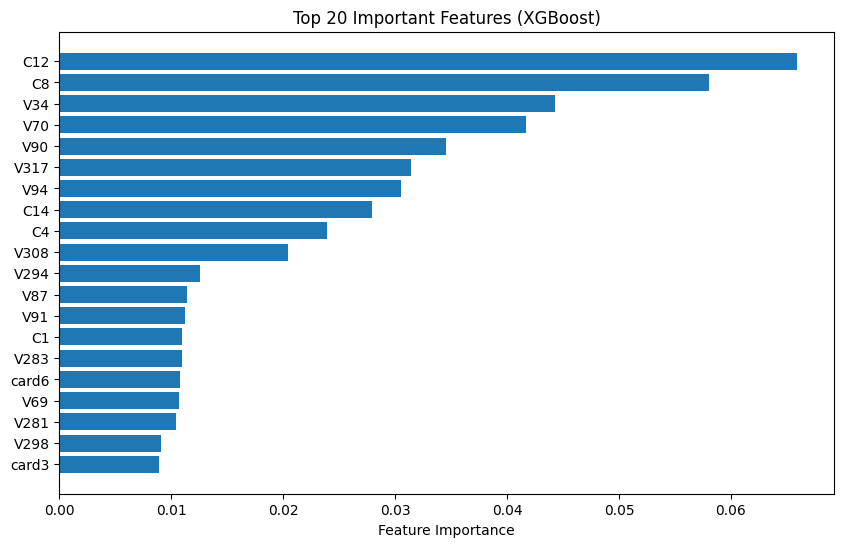

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = xgb_model.feature_importances_
feature_names = np.array(train_df.columns)

# Sort and plot
sorted_idx = np.argsort(importances)[::-1][:20]  # Top 20 features
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features (XGBoost)")
plt.gca().invert_yaxis()
plt.show()
